# Predicting sales from advertisement invests
First, load the data and show it

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import requests
import zipfile
import os

url = "https://raw.githubusercontent.com/AImotion-Bavaria/dpds/main/data/data_advertising.csv"
downloaded_file = "data_advertising.csv"

if not(os.path.exists(downloaded_file)):
    response = requests.get(url)
    with open(downloaded_file, "wb") as file:
        file.write(response.content)   
    
data_file = downloaded_file

data = pd.read_csv(downloaded_file)
print(data.head())
data 

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Now create a plot like the one below for all other features

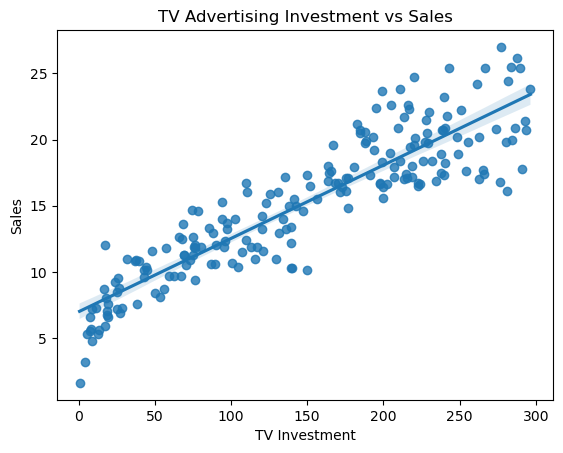

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the scatter plot using Seaborn
sns.regplot(data=data, x='TV', y='Sales')

# Set plot title and labels
plt.title("TV Advertising Investment vs Sales")
plt.xlabel("TV Investment")
plt.ylabel("Sales")

# Display the plot
plt.show()


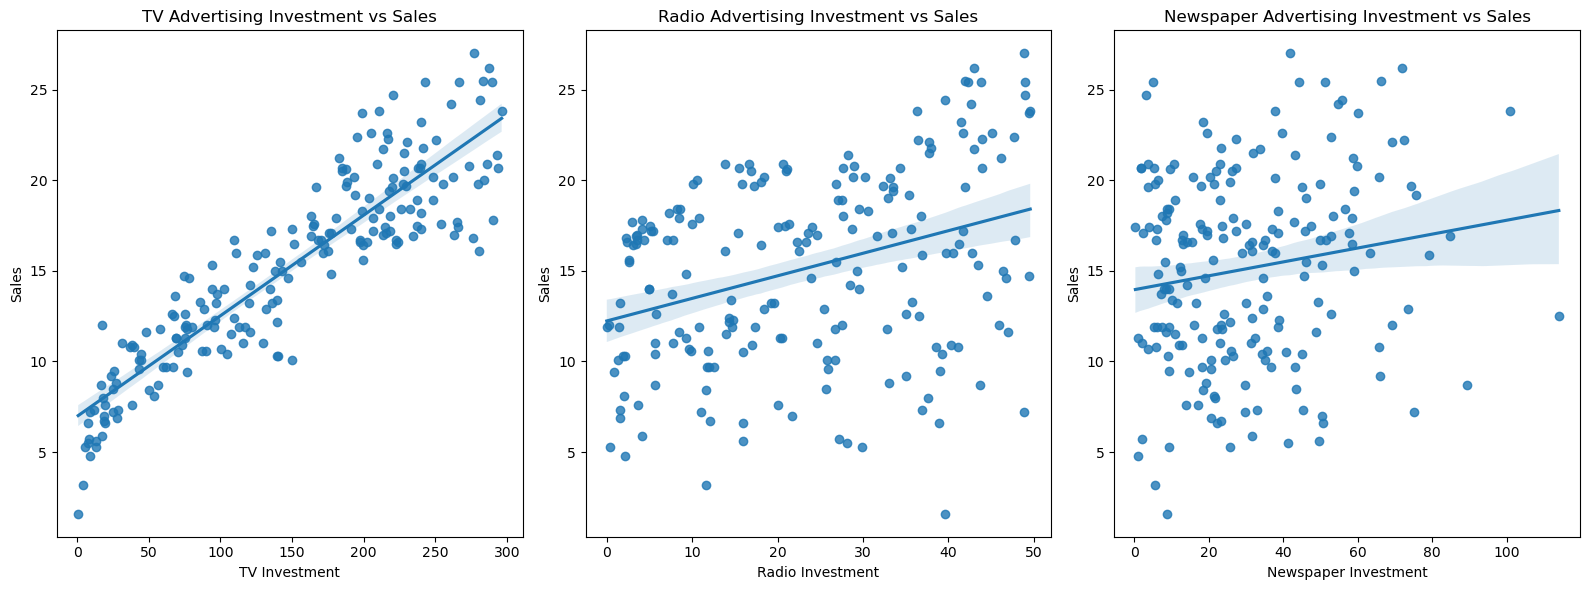

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create a subplot with three figures
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Iterate over each column and create scatter plot with trend line
for i, column in enumerate(['TV', 'Radio', 'Newspaper']):
    sns.regplot(data=data, x=column, y='Sales', ax=axes[i])
    axes[i].set_title(f'{column} Advertising Investment vs Sales')
    axes[i].set_xlabel(f'{column} Investment')
    axes[i].set_ylabel('Sales')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


# Correlation
Show the correlation between the different features and sales (hint use `data.corr()`)

In [8]:
correlation = data.corr() 
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


# Training a predictive model
Try using either a `LinearRegression` or `DecisionTreeRegression` model with a proper `train_test_split`

In [11]:
X = np.array(data.drop(["Sales"], 1))
y = np.array(data["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(X, y, 
                                                test_size=0.2, 
                                                random_state=42)
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9059011844150826


c:\temp\ipykernel_28108\585454572.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(["Sales"], 1))


In [26]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9114675529350088


In [13]:
print(model.feature_importances_)

[0.83186189 0.14565991 0.0224782 ]


## Variants of feature sets
Remove the most important feature and

In [20]:
# let's train another model just based on TV sales
xtrain_2 = xtrain[:,0].reshape(-1,1)
print(xtrain_2.shape)

xtest_2 = xtest[:,0].reshape(-1, 1)
print(xtest_2.shape)



(160, 1)
(40, 1)


In [23]:
model = DecisionTreeRegressor()
model.fit(xtrain_2, ytrain)
print(model.score(xtest_2, ytest))

0.8040178990391927
